In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("project.ipynb")

# Project 2 – COVID Vaccinations 🦠

## DSC 80, Fall 2022

### Checkpoint Due Date: Thursday, October 20th (Questions 1, 2, 6, 8, and 10)
### Due Date: Thursday, October 27th

## Instructions 📝

Welcome to Project 2!

---

### Working on the Project 💻

This Jupyter Notebook contains the statements of the problems and provides code and Markdown cells to display your answers to the problems.  

* Like in labs, your coding work will be developed in the accompanying `project.py` file, that will be imported into the current notebook. This code will be autograded.
* Note that there is no manually-graded component to Project 2, so the only thing you will ever submit is `project.py`.
* **For the checkpoint, you only need to turn in a `project.py` containing solutions for Questions 1, 2, 6, 8, and 10!**
    - The "Project 2 Checkpoint" autograder on Gradescope does not thoroughly check your code – it only runs the public notebook tests on the checkpoint questions to make sure that you have completed them. When you submit the final version of the project, we will use hidden tests to check your answers more thoroughly.
    - Note that this means you will ultimately have to submit the project twice – once to the "Project 2 Checkpoint" autograder (Questions 1, 2, 6, 8, and 10 only), and once to the "Project 2" autograder (once you're fully done).
    - The reason for skipping around is that **the project has two distinct parts, and you should start on both parts by the time the checkpoint is due**. Note that the checkpoint questions are less than half of the total project (and some of them are easier than the average project question), so budget your time appropriately for completing the rest of the project.

**Do not change the function names in the `project.py` file!**
- The functions in the `project.py` file are how your assignment is graded, and they are graded by their name.
- If you changed something you weren't supposed to, just use git to revert! Ask us if you need help with this, or Google around for `git revert`.

**Tips for developing in the `project.py` file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are **encouraged to write your own additional functions** to solve the questions! 
- Always document your code!

**Tips for testing the correctness of your answers:**

Once you write your code in `project.py`, you should use your notebook to inspect and analyze your functions' outputs for correctness. You should also run the doctests on the command line, and submit a version of your project to the Gradescope autograder well in advance of the deadline to ensure that there are no unexpected bugs in your code or your computing environment.

<span style='color:red'><b>Note that in this project, the doctests and public Otter notebook tests are not identical</b></span>, though they test similar ideas. In particular, the doctests often test your functions on smaller subsets of the larger datasets that we use in the notebook. **You should regularly run both.**

### Warning! ⚠️

This project contains larger datasets than usual. They aren't huge, but they aren't tiny. The autograder has been set to allow more memory usage than usual, but if you write inefficient code you may exhaust all of the allocated memory, causing the autograder to fail. If this happens, the autograder will say that your submission was formatted incorrectly.

**Writing efficient code is part of the project!** Be sure to submit your code to the Gradescope autograder regularly to check that it is efficient enough. If your code fails to run on the autograder due to efficiency reasons and it is past the late deadline, we will perform a "catastrophic regrade" by removing your inefficient code (deleting that function definition) and charging the usual cost of two slip days. This is expensive, so be sure to check that your code works with the autograder with plenty of time before the deadline!

### Working with a Partner 🧑‍🤝‍🧑

You are allowed to work with a partner on projects in DSC 80. If you do work with a partner, you must follow the [Pair Programming Guidelines](https://dsc10.com/pair-programming/). Specifically, you must be actively working on the project at the same time on one computer. Splitting up the project and working on it separately **is not** pair programming.

You can use the Google Sheet posted on the class messageboard to find a partner.

Note that if you do work with a partner, you and your partner must submit the Checkpoint together and the whole project together.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import os

import pathlib
import urllib.request

# if this cell raises an ImportError, you should install `ipywidgets`
from ipywidgets import interact, FloatSlider

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rc('figure', dpi=100, figsize=(8, 5))
plt.rc('font', size=12)

In [4]:
from project import *

## About the Assignment

Data science has been an important tool in understanding the development of the COVID-19 pandemic. In this project, we'll take a took at two real-world datasets that measure vaccination rates and effectiveness.

---

### Navigating the Project

Click on the links below to navigate to different parts of the project. Note that Questions 1, 2, 6, 8, and 10 constitute your Checkpoint submission.

- [Part 1: Global Vaccination Rates 🌎](#part1)
    - [Question 1 (Checkpoint Question)](#Question-1-(Checkpoint-Question))
    - [Question 2 (Checkpoint Question)](#Question-2-(Checkpoint-Question))
    - [Question 3](#Question-3)
    - [Question 4](#Question-4)
    - [Question 5](#Question-5)
- [Part 2: Vaccine Effectiveness 💉](#part2)
    - [Question 6 (Checkpoint Question)](#Question-6-(Checkpoint-Question))
    - [Question 7](#Question-7)
    - [Question 8 (Checkpoint Question)](#Question-8-(Checkpoint-Question))
    - [Question 9](#Question-9)
    - [Question 10 (Checkpoint Question)](#Question-10-(Checkpoint-Question))
    - [Question 11](#Question-11)

---

The file `data/covid_vaccinations_updated.csv` contains information on the number of COVID vaccinations that have been administered in various countries and regions of the world, as of September 21st, 2022:

In [5]:
vacs = pd.read_csv(os.path.join('data', 'covid_vaccinations_updated.csv'))
vacs

,Date,Country_Region,Doses_admin,People_at_least_one_dose
0,2020-12-29,Austria,2.121000e+03,2.121000e+03
1,2020-12-29,Bahrain,5.501400e+04,5.501400e+04
2,2020-12-29,Belarus,0.000000e+00,0.000000e+00
3,2020-12-29,Belgium,3.400000e+02,3.400000e+02
4,2020-12-29,Canada,5.907900e+04,5.907800e+04
...,...,...,...,...
114807,2022-10-10,West Bank and Gaza,3.741181e+06,2.010433e+06
114808,2022-10-10,World,1.282398e+10,5.408442e+09
114809,2022-10-10,Yemen,1.065395e+06,8.616250e+05
114810,2022-10-10,Zambia,9.408734e+06,8.233510e+06


<a name='part1'></a>

## Part 1: Global Vaccination Rates 🌎

One question we might hope to answer with this data is, **does the population density of countries affect vaccination rates?** *A priori*, we might think that denser countries are more vaccinated -- is this true? We will try answering this by looking at the average vaccination rates for countries with similar densities.

We may think that we can use this data directly for getting the vaccination rate but unfortunately, the messiness of real-world data means that answering even this question requires a bit of cleaning and organization. We'll do this cleaning and organization in the next few questions.

First, we need to find the total number of vaccinated individuals in each country/region. To do this, we have to understand what the values in the `'People_at_least_one_dose'` column mean. Are they the number people vaccinated on *that day*? Or are they the *cumulative* number of vaccinated people? This can be answered with a plot.

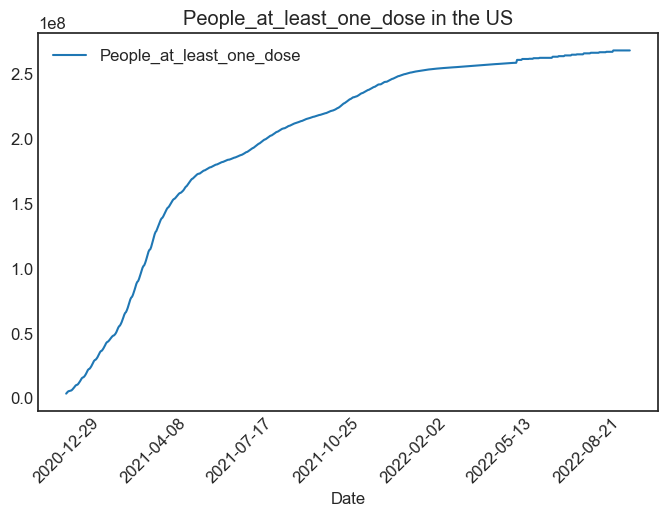

In [6]:
vacs[vacs['Country_Region'] == 'US'].plot(x='Date', y='People_at_least_one_dose')
plt.title('People_at_least_one_dose in the US')
plt.xticks(rotation=45);

In [8]:
x = vacs[vacs['Country_Region'] == 'US']
x

,Date,Country_Region,Doses_admin,People_at_least_one_dose
32,2020-12-29,US,3683482.0,3592944.0
68,2020-12-30,US,4408691.0,4298399.0
108,2020-12-31,US,5253948.0,5122849.0
148,2021-01-01,US,5677274.0,5535575.0
189,2021-01-02,US,5799712.0,5645916.0
...,...,...,...,...
114021,2022-10-06,US,624198981.0,268373101.0
114215,2022-10-07,US,624198981.0,268373101.0
114409,2022-10-08,US,624198981.0,268373101.0
114603,2022-10-09,US,624198981.0,268373101.0


Since the curve *appears* to be always increasing, this plot suggests that the `'Doses_admin'` column contains the *cumulative* number of doses administered, and this is indeed what the column is *supposed* to be. However, this is messy, real-world data, and you can't *assume* that the reported vaccination rates are monotonically increasing (or, rather, monotonically non-decreasing). For example, let's look at the plot for Ethiopia:

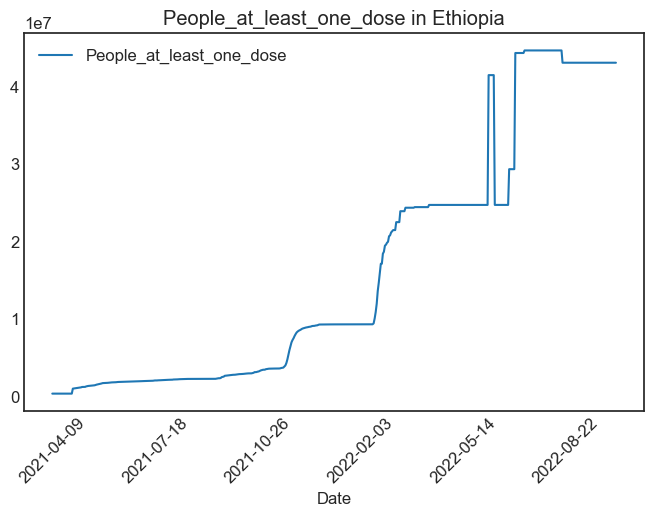

In [9]:
vacs[vacs['Country_Region'] == 'Ethiopia'].plot(x='Date', y='People_at_least_one_dose')
plt.title('People_at_least_one_dose in Ethiopia')
plt.xticks(rotation=45);

Notice the dips in the graph? Unless there were *negative* doses administered (which would be... awkward), we must conclude that the data is messy - there will be instances where, either due to errors in reporting or in recording, the cumulative number of doses actually *decreases* from one day to the next.

### Question 1 (✅ Checkpoint Question)

Let's explore whether the messiness seen above is common.

#### `count_monotonic`

Create a function named `count_monotonic` which accepts a 1D `numpy` array and returns the counts of how many times an entry in the array (except the first) is strictly less than the previous entry.

***Hint***: There's a `numpy` function for computing the difference between consecutive elements of an array.

<br>

#### `monotonic_violations_by_country`

Create a function named `monotonic_violations_by_country` which accepts a DataFrame like `vacs` and returns a DataFrame with one row for each country and two `int` columns – `'Doses_admin_monotonic'` and `'People_at_least_one_dose_monotonic'`. An entry in the `'Doses_admin'` column should be the number of times a country's `'Doses_admin'` is NOT monotonically increasing; likewise for the other columns. The index of the returned DataFrame should contain country names.

***Note:*** No looping is allowed, but `groupby` is your friend. Use the `count_monotonic` function, along with the assumption that the input DataFrame `vacs` is already sorted by date.

In [20]:
# run this to see the result, and don't change this cell -- it is used by the tests
mono = monotonic_violations_by_country(vacs)
mono

In [43]:
l = np.array([3, 6, 6, 2, 5, 8])
np.count_nonzero(np.diff(l) < 0)

dam = vacs[[
    'Country_Region', 
    'Doses_admin', 
    'People_at_least_one_dose'
    ]].groupby('Country_Region').apply(lambda row: count_monotonic(np.array(row['Doses_admin'])))
patlodm = vacs[[
    'Country_Region', 
    'Doses_admin', 
    'People_at_least_one_dose'
    ]].groupby('Country_Region').apply(lambda row: count_monotonic(np.array(row['People_at_least_one_dose'])))

data = pd.concat([dam, patlodm], axis=1)
df = pd.DataFrame(data = data, columns= ['Doses_admin_monotonic', 'People_at_least_one_dose_monotonic'])

df['Doses_admin_monotonic'] = dam
df['People_at_least_one_dose_monotonic'] = patlodm
df

,Doses_admin_monotonic,People_at_least_one_dose_monotonic
Country_Region,,
Afghanistan,0,0
Albania,1,1
Algeria,0,1
Andorra,1,1
Angola,1,2
...,...,...
West Bank and Gaza,0,0
World,6,12
Yemen,0,0


In [ ]:
grader.check("q1")

If you've completed Question 1 correctly, you should see that it is not rare for the data to violate the monotonicity assumption (and multiple times at that). We'll have to take this into account when doing our data analysis.

### Question 2 (✅ Checkpoint Question)

To get the vaccination rate, we'd like to get the total number of doses administered and people vaccinated for each country. If the data were truly monotonic, we could simply group by country and find the maximum within each group and within each column – this would be the overall cumulative total. However, if the data has errors that make it not monotonically increasing, there could be a noisy "spike" in the graph (as in the plot for Ethiopia above), so that the maximum may be an unfaithful measure of the total number of doses. Instead of the maximum, we should use something more robust, such as **the 97th percentile**.

Create a function named `robust_totals` that accepts a DataFrame like `vacs` and returns a DataFrame with one row for each country and two columns – `'Doses_admin'` and `'People_at_least_one_dose'`. The `'Doses_admin'` column should contain the 97th percentile of the `'Doses_admin'` values for each country; likewise for the other column. The index of the returned DataFrame should contain country names.

In [21]:
# run this to see the result, and don't change this cell -- it is used by the tests
tots = robust_totals(vacs)
tots

In [95]:

da = vacs[[
    'Country_Region', 
    'Doses_admin', 
    'People_at_least_one_dose'
    ]].groupby('Country_Region').apply(lambda row: np.percentile(row['Doses_admin'], 97))
patlod = vacs[[
    'Country_Region', 
    'Doses_admin', 
    'People_at_least_one_dose'
    ]].groupby('Country_Region').apply(lambda row: np.percentile(row['People_at_least_one_dose'], 97))

df = pd.DataFrame(index=da.index, columns=['Doses_admin', 'People_at_least_one_dose'])
df['Doses_admin'] = da
df['People_at_least_one_dose'] = patlod
df

tots = df




In [ ]:
grader.check("q2")

We want to calculate the vaccination rate for each country by using the number of people vaccinated as a percentage of the total population. We then want to use this information in conjunction with population density to answer our initial question. Of course, our original vaccination dataset does not contain population data. Luckily, we have access to a separate dataset of country statistics:

In [138]:
pops_raw = pd.read_csv(os.path.join('data', 'populations_updated.csv'))
pops_raw

,Country (or dependency),Population in 2022,World Percentage,Area (Km²),Density (P/Km²)
0,China,1425887.337,17.88%,"9,706,961 Km²",146.8933/Km²
1,India,1417173.173,17.77%,"3,287,590 Km²",431.0675/Km²
2,United States,338289.857,4.24%,"9,372,610 Km²",36.0935/Km²
3,Indonesia,275501.339,3.45%,"1,904,569 Km²",144.6529/Km²
4,Pakistan,235824.862,2.96%,"881,912 Km²",267.4018/Km²
...,...,...,...,...,...
229,Montserrat,4.390,0.0%,102 Km²,43.0392/Km²
230,Falkland Islands,3.780,0.0%,"12,173 Km²",0.3105/Km²
231,Niue,1.934,0.0%,260 Km²,7.4385/Km²
232,Tokelau,1.871,0.0%,12 Km²,155.9167/Km²


### Question 3

Unfortunately, this DataFrame's data types require some cleaning. All of the columns except the first are numeric and should either be integers or floats, as appropriate, but many of them are being stored incorrectly.

Create a function named `fix_dtypes` which accepts a DataFrame like `pops_raw` above and returns a DataFrame with exactly the same columns and rows, but with the data types "fixed" to be appropriate for the data contained within.

**Note:**
 - All percentages should be represented as decimals – e.g., 27% should be 0.27.
 - `Population in 2022` is currently being stored in thousands. That is, the population of Tokelau is 1,871 people, but it is represented as 1.871 in the dataset above. "Convert" this population total to the actual number of people. That is, in your resulting dataframe, the population of Tokelau should be 1871.

***Hint:*** You can make helper functions! It's OK to loop over the **columns** of the DataFrame (but not the rows).

As always, make sure that your function does not change the DataFrame it is called on!

In [139]:
# run this to see the result, and don't change this cell -- it is used by the tests
pops = fix_dtypes(pops_raw)
pops

,Country (or dependency),Population in 2022,World Percentage,Area (Km²),Density (P/Km²)
0,China,1425887337,0.1788,9706961,146.8933
1,India,1417173173,0.1777,3287590,431.0675
2,United States,338289857,0.0424,9372610,36.0935
3,Indonesia,275501339,0.0345,1904569,144.6529
4,Pakistan,235824862,0.0296,881912,267.4018
...,...,...,...,...,...
229,Montserrat,4390,0.0000,102,43.0392
230,Falkland Islands,3780,0.0000,12173,0.3105
231,Niue,1934,0.0000,260,7.4385
232,Tokelau,1871,0.0000,12,155.9167


In [146]:
def fix_dtypes(pops_raw):
    """
    Accepts a DataFrame like pops_raw above and returns a DataFrame with exactly
    the same columns and rows, but with the data types "fixed" to be appropriate
    for the data contained within. All percentages should be represented as decimals – e.g.,
    27% should be 0.27 and population should be represented as a whole number.
    
    Example
    -------
    
    >>> pops_raw = pd.read_csv(os.path.join('data', 'populations_updated.csv'))
    >>> pops = fix_dtypes(pops_raw)
    >>> isinstance(pops, pd.DataFrame)
    True
    >>> pops.shape
    (234, 5)
    >>> pops.loc[pops['Country (or dependency)'] == 'Montserrat', 'Population in 2022'].iloc[0]
    4390
    
    """
    df = pops_raw.copy()

    df['Population in 2022'] = np.array(df['Population in 2022']*1000).astype(np.int64)
    df['World Percentage'] = df['World Percentage'].apply(lambda pc: float(pc.replace('%',''))/100)
    df['Area (Km²)'] = np.array(df['Area (Km²)'].apply(lambda a: a.replace(',','').replace(' Km²',''))).astype(np.int64)
    df['Density (P/Km²)'] = np.array(df['Density (P/Km²)'].apply(lambda d: d.replace('/Km²', ''))).astype(np.float64)
    return df

def robust_totals(vacs):
    """
    Accepts a DataFrame like vacs above and returns a DataFrame with one row for each 
    country/region and two columns - Doses_admin and People_at_least_one_dose - where 
    an entry in the Doses_admin column is the 97th percentile of the values in that column
    for that country; likewise for the other column. The index of the returned DataFrame
    should contain country names.
    
    Example
    -------
    
    >>> # this file contains a subset of `vacs`
    >>> subset_vacs = pd.read_csv(os.path.join('data', 'covid-vaccinations-subset.csv'))
    >>> subset_tots = robust_totals(subset_vacs)
    >>> isinstance(subset_tots, pd.DataFrame)
    True
    >>> subset_tots.shape
    (2, 2)
    >>> int(subset_tots.loc['Venezuela', 'Doses_admin'])
    37860994
    
    """
    da = vacs[[
    'Country_Region', 
    'Doses_admin', 
    'People_at_least_one_dose'
    ]].groupby('Country_Region').apply(lambda row: np.percentile(row['Doses_admin'], 97))
    patlod = vacs[[
        'Country_Region', 
        'Doses_admin', 
        'People_at_least_one_dose'
        ]].groupby('Country_Region').apply(lambda row: np.percentile(row['People_at_least_one_dose'], 97))

    df = pd.DataFrame(index=da.index, columns=['Doses_admin', 'People_at_least_one_dose'])
    df['Doses_admin'] = da
    df['People_at_least_one_dose'] = patlod
    return df
    

In [87]:
pops_raw = pd.read_csv(os.path.join('data', 'populations_updated.csv'))
df = pops_raw

df['Population in 2022'] = np.array(df['Population in 2022']*1000).astype(np.int64)
df['World Percentage'] = df['World Percentage'].apply(lambda pc: float(pc.replace('%',''))/100)
df['Area (Km²)'] = np.array(df['Area (Km²)'].apply(lambda a: a.replace(',','').replace(' Km²',''))).astype(np.int64)
df['Density (P/Km²)'] = np.array(df['Density (P/Km²)'].apply(lambda d: d.replace('/Km²', ''))).astype(np.float64)
df

pops = df
pops.loc[pops['Country (or dependency)'] == 'Montserrat', 'Population in 2022'].iloc[0]

4390

In [76]:
1425887.337*1000

1425887337.0

In [ ]:
grader.check("q3")

### Question 4

Remember that one of the steps towards our goal is to compute the percentage of people vaccinated in each country. Our next step is to take the population and density numbers from the previous problem and insert them into the DataFrame of vaccination numbers (`tots`). In theory this is a simple `concat` or `merge`, but there's a problem: the names of the countries are not always the same in each DataFrame.

#### `missing_in_pops`
First, create a function named `missing_in_pops` which takes in two DataFrames, the first, like `tots` above, containing the total number of vaccinations per country, and the second like `pops` above, containing the population of each country. It should return a Python **set** of names that appear in `tots` but not in `pops`.

***Hint:*** `pandas` indexes have a method that checks if each element of the index is a member of some other collection. **Do not** use a `for`-loop.

<br>

#### `fix_names`
After running `missing_in_pops`, you'll notice that there are 11 countries that appear in `tots` that do not appear in `pops`. It turns out that most of these countries *do* appear in `pops`, just under a different name or spelling. Using the power of Google or your ✨*domain knowledge*✨, combined with an exploration of the `tots` DataFrame, create a function named `fix_names` that accepts one argument – a DataFrame like `pops` – and returns a copy of `pops`, but with the `'Country (or dependency)'` column changed so that all countries that appear in `tots` also appear in the result, with a few exceptions listed below. 

For example, the country `'Burma'` appears in `tots`, but is listed as `'Myanmar'` in `pops`. In the DataFrame returned by your function, `'Myanmar'` should be changed to `'Burma'` to match `tots`.

As noted above, there are a few exceptions:

- `'Kosovo'` does not appear in `pops`. You do not need to change an entry in `pops` to match it.
- There is a region simply called `'World'`. This doesn't appear in `pops`. You do not need to change an entry in `pops` to match it.

In [159]:
# run this to see the result, and don't change this cell -- it is used by the tests
missing = missing_in_pops(tots, pops)
missing

{'Burma',
 'Cabo Verde',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czechia',
 'Korea, South',
 'Kosovo',
 'US',
 'West Bank and Gaza',
 'World'}

In [145]:
tots

In [155]:
pops_raw = pd.read_csv(os.path.join('data', 'populations_updated.csv'))
pops = fix_dtypes(pops_raw)
tots = robust_totals(vacs)


rdict = {
        'Myanmar': 'Burma',
        'Cape Verde': 'Cabo Verde',
        'United States': 'US',
        'South Korea': 'Korea, South',
        'Czech Republic': 'Czechia',
        'Ivory Coast': "Cote d'Ivoire",
        'DR Congo': 'Congo (Kinshasa)',
        'Republic of the Congo': 'Congo (Brazzaville)',
        'Palestine': 'West Bank and Gaza'
        }

pops2 = pops.replace({'Country (or dependency)': rdict})

totsidx = tots.index
clist = set(totsidx[totsidx.isin(pops['Country (or dependency)'])])

pops2c = np.array(pops2['Country (or dependency)'])
totsc = np.array(totsidx)

diff = np.setdiff1d(pops2c, totsc, assume_unique=True)
diff

pops2

,Country (or dependency),Population in 2022,World Percentage,Area (Km²),Density (P/Km²)
0,China,1425887337,0.1788,9706961,146.8933
1,India,1417173173,0.1777,3287590,431.0675
2,US,338289857,0.0424,9372610,36.0935
3,Indonesia,275501339,0.0345,1904569,144.6529
4,Pakistan,235824862,0.0296,881912,267.4018
...,...,...,...,...,...
229,Montserrat,4390,0.0000,102,43.0392
230,Falkland Islands,3780,0.0000,12173,0.3105
231,Niue,1934,0.0000,260,7.4385
232,Tokelau,1871,0.0000,12,155.9167


In [156]:
# run this to see the result, and don't change this cell -- it is used by the tests
pops_fixed = fix_names(pops)
pops_fixed

,Country (or dependency),Population in 2022,World Percentage,Area (Km²),Density (P/Km²)
0,China,1425887337,0.1788,9706961,146.8933
1,India,1417173173,0.1777,3287590,431.0675
2,US,338289857,0.0424,9372610,36.0935
3,Indonesia,275501339,0.0345,1904569,144.6529
4,Pakistan,235824862,0.0296,881912,267.4018
...,...,...,...,...,...
229,Montserrat,4390,0.0000,102,43.0392
230,Falkland Islands,3780,0.0000,12173,0.3105
231,Niue,1934,0.0000,260,7.4385
232,Tokelau,1871,0.0000,12,155.9167


In [ ]:
grader.check("q4")

In [158]:
not 'Myanmar' in pops_fixed['Country (or dependency)'].values

True

### Question 5

Finally, our data is clean and we can analyze the association between vaccination rate and population density.

To reduce noise, we will group countries into bins by their population densities, and then compute the mean vaccination rate within each bin. To be precise, we will divide the countries into $k$ bins based on *sample quantiles* -- *pandas* provides the `pd.qcut` function for just this purpose. The first bin will countain the lowest-density countries, the second bin will contain the next lowest density countries, and so forth. We'll leave understanding how to use `pd.qcut` as an exercise for the reader -- remember, the documentation is helpful!

To answer this question, create a function named `partially_vaccinated_by_pop_density` that accepts three arguments: a DataFrame like `tots`, a DataFrame like `pops_fixed`, and an integer, `k`, and returns a Series of average vaccination rates within each of the $k$ bins described above.

The index of the Series should be the population density bin(s) returned by `pd.qcut`, and values should be average vaccination rates for countries in those bins as decimal numbers between 0 and 1.

The index should be in sorted ascending order so its easier to see if there is a relationship between vaccination rates and the population density of a country.

**Note**:
- The $k$ population density bins *must* be generated by using the `pd.qcut` function. This means the index of the returned series must contain objects of the type [pd.Interval](https://pandas.pydata.org/docs/reference/api/pandas.Interval.html) with `closed='Right'` which corresponds to an interval from a (exclusive) to b (inclusive) seen in math such as (a, b]
- For the purposes of this question, we define vaccination rate to be the number of individuals with at least one dose divided by the total population. 
- You may note when getting the vaccination rates for countries that some of them are greater than 1, you should clip these values to keep them between 0 and 1 before calculating the average vaccination rate for the population density bins.
- Note that your function will be doing a lot: it has to merge data sets, discretize the data into bins, compute vaccination rates, etc. Despite this, the code does not need to be all that long or complex -- it is possible to solve this with a handful of lines of code.

In [56]:
# run this to see the result, and don't change this cell -- it is used by the tests
bin_10 = partially_vaccinated_by_pop_density(tots, pops_fixed, 10)
bin_10

In [179]:
pops_fixed = fix_names(pops)
tots = robust_totals(vacs)

mdf = tots.merge(
                pops_fixed, 
                left_index=True, 
                right_on='Country (or dependency)'
                )[[
                    'Density (P/Km²)',
                    'People_at_least_one_dose',
                    'Population in 2022'
                    ]]

mdf['vr'] = (mdf['People_at_least_one_dose']/mdf['Population in 2022']).clip(0,1)
mdf['bin'] = pd.qcut(mdf['Density (P/Km²)'], q=10)
binneddf = mdf.groupby('bin').mean()


binneddf['vr']

bin
(2.172, 16.682]       0.565709
(16.682, 26.639]      0.519655
(26.639, 47.823]      0.581933
(47.823, 67.153]      0.423797
(67.153, 89.101]      0.548997
(89.101, 111.648]     0.628321
(111.648, 153.202]    0.600948
(153.202, 239.063]    0.634567
(239.063, 429.93]     0.588317
(429.93, 18234.5]     0.711416
Name: vr, dtype: float64

In [180]:
def partially_vaccinated_by_pop_density(tots, pops_fixed, k):
    """
    Accepts three arguments: a DataFrame like `tots`, a DataFrame like `pops_fixed`, 
    and an integer, `k`, and returns a Series of the average vaccination rates based
    on population density bin. There should be k equal-sized population density bins based on quantiles. 
    
    For the purposes of this question, we define vaccination rates 
    to be the number of people with at least one dose divided by the total population. 
    The index of the Series should be the bin, and values should be the partial vaccination rates,
    which are decimal numbers between 0 and 1.
    
    Example
    -------
    
    >>> # this file contains a subset of `tots`
    >>> tots_sample = pd.read_csv(os.path.join('data', 'tots_sample_for_tests.csv')).set_index('Country_Region')
    >>> pops_raw = pd.read_csv(os.path.join('data', 'populations_updated.csv'))
    >>> pops = fix_dtypes(pops_raw)
    >>> pops_fixed = fix_names(pops)
    >>> partially_vaccinated_by_pop_density(tots_sample, pops_fixed, 10).index[2]
    pd.Interval(25.964, 41.358, closed='right')
    """
    mdf = tots.merge(
                pops_fixed, 
                left_index=True, 
                right_on='Country (or dependency)'
                )[[
                    'Density (P/Km²)',
                    'People_at_least_one_dose',
                    'Population in 2022'
                    ]]

    mdf['vr'] = (mdf['People_at_least_one_dose']/mdf['Population in 2022']).clip(0,1)
    mdf['bin'] = pd.qcut(mdf['Density (P/Km²)'], q=10)
    binneddf = mdf.groupby('bin').mean()


    return binneddf['vr']

tots_sample = pd.read_csv(os.path.join('data', 'tots_sample_for_tests.csv')).set_index('Country_Region')
pops_raw = pd.read_csv(os.path.join('data', 'populations_updated.csv'))
pops = fix_dtypes(pops_raw)
pops_fixed = fix_names(pops)
partially_vaccinated_by_pop_density(tots_sample, pops_fixed, 10).index[2]


Interval(25.964, 41.358, closed='right')

In [57]:
# a plot of the mean vaccination rate by density bin - what do you think?
bin_10.plot.bar()

In [ ]:
grader.check("q5")

That's it for Part 1 of the project!

---

<a name='part2'></a>

## Part 2: Vaccine Effectiveness 💉

There has naturally been much interest in the effectiveness of COVID-19 vaccines. In particular, recent reports suggest that the effectiveness of vaccines – and the Pfizer vaccine in particular – may decrease over time. While this is true, the public perception of declining vaccine effectiveness has been affected by what is often a poor use of statistics by media outlets.

For example, take the following blurb from [this article](https://www.cbc.ca/news/world/israel-covid-delta-variant-booster-1.6159472) on the Canadian Broadcasting Corporation's website (emphasis added):

> Meanwhile, Israeli health officials reported what appeared to be a waning efficacy of the vaccine, including among those who had been double vaccinated. **Data showed that of the serious cases being admitted to hospital, around 60 per cent of patients were people who had been fully vaccinated**, though most were over 60 or with underlying health conditions.

This stat sounds terrible – if you're sick in a hospital bed with COVID-19, you're actually more likely to be vaccinated than not! If you're not a data scientist, you might come away with the conclusion that the vaccine is no longer effective against serious illness, or – even worse – that getting the vaccine will **increase** your risk of sickness. Of course, this statistic by itself is actually meaningless. For instance, imagine a world in which 100% of people are vaccinated. Then 100% of people admitted to the hospital will be vaccinated, too! In Question 8, we will explain the theory behind **vaccine effectiveness**, a statistic that more meaningfully measures the improvement in outcomes for vaccinated individuals over unvaccinated individuals.

To start, let's load in some data. For this project, we'll work with a dataset of vaccine effectiveness in Israel through mid-summer 2021. The vaccination and hospitalization records in the dataset are real. Israel was mostly vaccinated using the Pfizer vaccine, and was one of the first places where lots of data on the Delta variant was gathered.

In [181]:
# Download Israeli COVID vaccinations data from the ☁️
if not pathlib.Path(os.path.join('data', 'israel.csv')).exists():
    urllib.request.urlretrieve(
        'https://f000.backblazeb2.com/file/dsc-data/covid-israel/israel.csv',
        os.path.join('data', 'israel.csv')
    )

In [182]:
israel_raw = pd.read_csv(os.path.join('data', 'israel.csv'))
israel_raw

,Age,Vaccinated,Severe Sickness
0,23,1,0
1,60,1,0
2,43,1,0
3,40,1,0
4,71,1,0
...,...,...,...
6937537,14,1,0
6937538,30,1,0
6937539,18,0,0
6937540,45,1,0


Each row in the dataset is a person. Some are vaccinated (marked with a 1 in the "Vaccinated" column), and some became severely ill (marked with a 1 in the "Severe Sickness" column).

As always, we will first check that the data is clean.

### Question 6 (✅ Checkpoint Question)

If you look at the data types of each column in `israel_raw`, you'll see that the `'Age'` column has a `dtype` of `object`. If you investigate further, you will see that a special value has been used to indicate that some ages are missing. Write a function named `clean_israel_data` that accepts a DataFrame like `israel_raw` and returns a *new* DataFrame where the missing ages are replaced by `np.NaN`s and the `'Age'` column's data type is `float`. Furthermore, the `'Vaccinated'` and `'Severe Sickness'` columns should be stored as `bool`s. The shape of the returned DataFrame should be the same as `israel_raw`, and, as usual, your function should not modify the input DataFrame.

In [196]:
out = israel_raw.copy()
out['Age'] = out['Age'].replace('-', np.NaN).astype(np.float64)
out['Vaccinated'] = out['Vaccinated'].astype(bool)
out['Severe Sickness'] = out['Severe Sickness'].astype(bool)
out.dtypes


Age                float64
Vaccinated            bool
Severe Sickness       bool
dtype: object

In [231]:
# run this to see the result, and don't change this cell -- it is used by the tests
israel = clean_israel_data(israel_raw)
israel

,Age,Vaccinated,Severe Sickness
0,23.0,True,False
1,60.0,True,False
2,43.0,True,False
3,40.0,True,False
4,71.0,True,False
...,...,...,...
6937537,14.0,True,False
6937538,30.0,True,False
6937539,18.0,False,False
6937540,45.0,True,False


In [ ]:
grader.check("q6")

We now need to decide what to do with the missing values in the `'Age'` column. Can we simply drop those rows? First, let's look at whether the missing values might be MCAR, NMAR, missing by design, etc. We'll first check to see if the distribution of the other columns differs depending on whether the ages are missing or not:

In [236]:
israel.assign(null_age=israel['Age'].isna()).groupby('null_age').mean()

,Age,Vaccinated,Severe Sickness
null_age,,,
False,41.036,0.812204,0.000074
True,NaN,0.805164,0.000000


### Question 7

Because the vaccination rate and severe sickness rate appear to be about the same, whether or not `'Age'` is missing, we hypothesize that `'Age'` is MCAR (missing completely at random). Let's investigate.

#### `mcar_permutation_tests`

Write a function named `mcar_permutation_tests` that accepts two arguments – a DataFrame like `israel` and a number `n_permutations` of permutations – and runs the two permutation tests described below. Your function should return a 2-tuple where the first entry is an array of the simulated test statistics for the first permutation test, and the second entry is an array of simulated test statistics for the second permutation test.

- The first permutation test should check the null hypothesis that values in the `'Vaccinated'` column for rows where the `'Age'` was missing were drawn from the same distribution as the values in rows where `'Age'` was not missing. The alternative hypothesis should be that they were drawn from *different* distributions. As your test statistic, use the **absolute difference in group means**. 
- The second permutation test should do the same, but for the `'Severe Sickness'` column.

***Note:*** Your code should run in less than two minutes when called with `n_permutations=100`. You should be able to run both permutation tests in a single `for`-loop.

<br>

#### `missingness_type`

Then, create a function named `missingness_type` that takes no arguments and returns a single integer corresponding to the option below that you think describes the type of missingess in this data:

1. MCAR (Missing completely at random)
2. MAR (Missing at random)
3. NMAR (Not missing at random)
4. Missing by design

In [226]:
        n_permutations = 100
        df = israel
        dfnomissing = df.dropna(axis=0, how= 'any')

        vacs = []
        sicks = []

        for i in range(n_permutations):
        sdf = df
        sdf['Vaccinated'] = np.random.permutation(sdf['Vaccinated'])
        sdf['Severe Sickness'] = np.random.permutation(sdf['Severe Sickness'])
        sdfnona = sdf.dropna(axis=0, how='any')

        vac = np.abs(
                np.mean(np.array(sdf['Vaccinated']))
                - np.mean(np.array(sdfnona['Vaccinated']))
                )

        sick = vac = np.abs(
                np.mean(np.array(sdf['Severe Sickness']))
                - np.mean(np.array(sdfnona['Severe Sickness']))
                )
        
        vacs.append(vac)
        sicks.append(sick)


        vacsarr = np.array(vacs)
        sicksarr = np.array(sicks)

        outup = (vacsarr, sicksarr)

In [241]:
df = israel
df['Age'] = np.random.permutation(df['Age'])
israel

,Age,Vaccinated,Severe Sickness
0,13.0,True,False
1,46.0,True,False
2,40.0,True,False
3,17.0,True,False
4,75.0,True,False
...,...,...,...
6937537,64.0,True,False
6937538,34.0,True,False
6937539,16.0,False,False
6937540,35.0,True,False


In [243]:
# run this to see the result, and don't change this cell -- it is used by the tests
test_stats_vax, test_stats_sick = mcar_permutation_tests(israel, 100)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

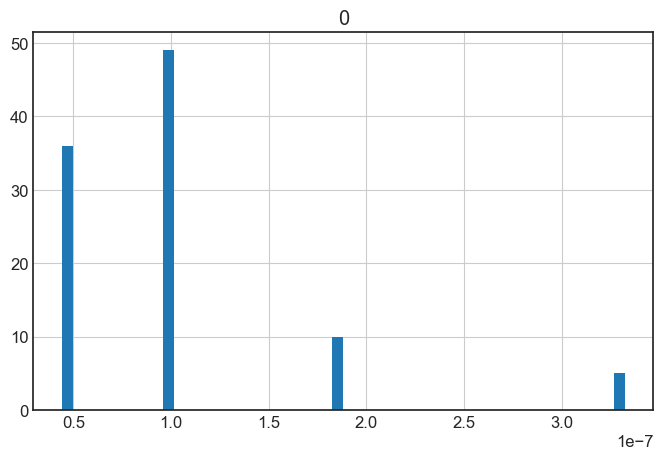

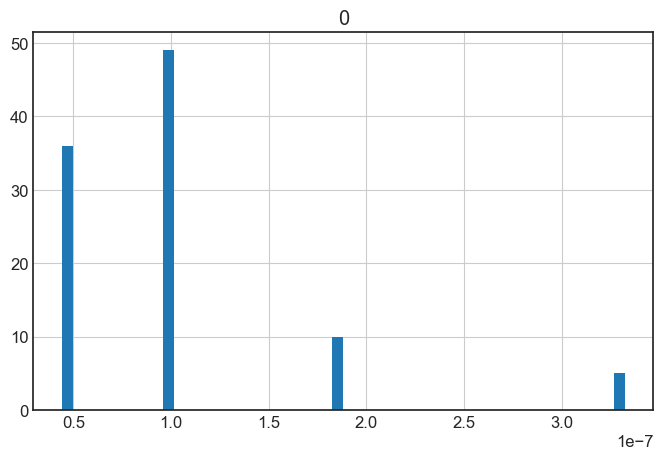

In [244]:
df1 = pd.DataFrame(test_stats_vax)
df2 = pd.DataFrame(test_stats_sick)

df1.hist(bins=50)
df2.hist(bins=50)

In [ ]:
grader.check("q7")

Let's proceed by simply dropping the rows with missing values:

In [287]:
vax = israel.dropna()

Moving forward, use `vax`, not `israel`.

### Question 8 (✅ Checkpoint Question)

***Note:*** Assume that "hospitalization" and "severe illness" mean the same thing; that is, if someone is hospitalized they developed severe illness and vice versa.

As mentioned at the start of Part 2, looking at the probability of being vaccinated if you're hospitalized is meaningless, since if everyone is vaccinated, this probability will be 1. Instead, we care about **the probability of being hospitalized if you're vaccinated.** More than that, what we care most about is how this probability relates to the probability of being hospitalized if you're **unvaccinated**.

To put it more concretely, let's say that 1 in 100 vaccinated people are hospitalized, while 10 in 100 unvaccinated people are hospitalized. This means that unvaccinated people are 10x more likely to be hospitalized than vaccinated people. To put it another way, if those 10 hospitalized unvaccinated people had been vaccinated, we'd expect that 9 of them would not have been hospitalized. That is, the vaccine would have prevented 90% of the hospitalizations, and we might therefore say that it is 90% effective against severe illness.

This is the intuition behind the definition of **vaccine effectiveness** (see the CDC's [page](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html) for more information). That is, to compute a vaccine's effectiveness, we need to know two things:

1. The proportion of vaccinated people who developed severe illness (i.e., the probability that a vaccinated person will be hospitalized). Call this $p_V$.
2. The proportion of unvaccinated people who developed severe illness (i.e., the probability that an unvaccinated person will be hospitalized). Call this $p_U$.

Then:

$$
\text{effectiveness} = 1 - \frac{p_V}{p_U} = \frac{p_U - p_V}{p_U}
$$

**What this formula calculates, in words, is the proportion of unvaccinated people with severe illness who would (we expect) not have severe illness if they were vaccinated.** For instance, if no one who is vaccinated becomes severely ill, then $p_V = 0$ and the effectiveness is 1 (100%). On the other hand, if the vaccine is no better than being unvaccinated, $p_V = p_U$ and the effectiveness is 0 (0%).


Many news articles report effectiveness numbers, and this is certainly better than reporting the percentage of hospital patients that are vaccinated. Note, though, that there are different types of effectiveness – effectiveness against severe illness, effectiveness against symptomatic illness, effectiveness against death – and articles often are vague about which they are using. But even then, effectiveness can *still* be misleading due to statistical quirks, as we'll now see.


<br>

**Your job is to** create a function named `effectiveness` that accepts a DataFrame like `vax` and returns the effectiveness of the vaccine against severe illness as a proportion between 0 and 1.

***Note:*** Assume that you will not run into any division-by-zero errors.

In [285]:
def effectiveness(df):
    """
    Accepts a DataFrame like vax above, and returns the effectiveness of the
    vaccine against severe illness.
    
    Example
    -------
    
    >>> example_vax = pd.DataFrame({
    ...             'Age': [15, 20, 25, 30, 35, 40],
    ...             'Vaccinated': [True, True, True, False, False, False],
    ...             'Severe Sickness': [True, False, False, False, True, True]
    ...         })
    >>> effectiveness(example_vax)
    0.5
    
    """
    unvaxtot = df[df['Vaccinated'] != True].shape[0]
    vaxtot = df[df['Vaccinated']].shape[0]
    unvaxss = df[(df['Vaccinated'] != True) &
                        (df['Severe Sickness'])].shape[0]
    vaxss = df[(df['Vaccinated']) &
                        (df['Severe Sickness'])].shape[0]
    pu = unvaxss/unvaxtot
    pv = vaxss/vaxtot

    eff = (pu - pv)/pu
    return eff 


In [288]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_overall = effectiveness(vax)
eff_overall

0.6747703568400142

In [ ]:
grader.check("q8")

If you implemented `effectiveness` correctly, you should see a vaccine effectiveness between 60% and 70%. This is OK, but not great! It means that the vaccine is only around 60-70% effective at preventing severe illness overall.

But remember Simpson's Paradox, which roughly says that sometimes a result that appears in aggregated data disappears when we look at disaggregated data. So let's disaggregate the data and perform the same calculation. That is, let's compute the effectiveness of the vaccine within each of several age groups. For convenience, here is a list of the age groups we'll consider:

In [289]:
AGE_GROUPS = [
    '12-15',
    '16-19',
    '20-29',
    '30-39',
    '40-49',
    '50-59',
    '60-69',
    '70-79',
    '80-89',
    '90-'
]

Each string above lists an age group. For example, the age group `'12-15'` should contain anyone aged 12, 13, 14, or 15. The last age group, '90-', denotes everyone who is 90 or above. `vax` does not contain anyone younger than 12.

### Question 9

Create a function named `stratified_effectiveness` that accepts one argument – a DataFrame like `vax` – and returns the effectiveness of the vaccine within each of the age groups in `AGE_GROUPS`. The return value of the function should be a Series of the same length as `AGE_GROUPS`, with the index of the Series being age groups as strings.

In [293]:
pd.DataFrame(index=AGE_GROUPS, dtype=np.float64, columns=['effectiveness'])

,effectiveness
12-15,NaN
16-19,NaN
20-29,NaN
30-39,NaN
40-49,NaN
50-59,NaN
60-69,NaN
70-79,NaN
80-89,NaN
90-,NaN


In [375]:
vax = israel.dropna()
df = vax.copy(deep=True)

out = pd.DataFrame(index=AGE_GROUPS, dtype=np.float64, columns=['effectiveness'])

df['age'] = pd.cut(df['Age'], bins= [12,16,20,30,40,50,60,70,80,90,1000], labels=AGE_GROUPS, right=False)


for age in AGE_GROUPS:
    tdf = df[df['age']==age]
    out.loc[age] = effectiveness(tdf)

out['effectiveness']



12-15    0.787517
16-19    0.807173
20-29    0.638418
30-39    0.546895
40-49    0.761402
50-59    0.606368
60-69    0.640950
70-79    0.489982
80-89    0.680529
90-      1.000000
Name: effectiveness, dtype: float64

In [374]:
df[df['age']== '30-39']['Age'].max()

40.0

In [331]:
def stratified_effectiveness(df):
    """
    Accepts one argument - a DataFrame like vax – and returns the effectiveness of the
    vaccine within each of the age groups in AGE_GROUPS. The return value of the function
    should be a Series of the same length as AGE_GROUPS, with the index of the Series being
    age groups as strings.
    
    Example
    -------
    
    >>> # this file contains a subset of israel.csv
    >>> israel_raw = pd.read_csv(os.path.join('data', 'israel-subset.csv'))
    >>> vax_subset = clean_israel_data(israel_raw).dropna()
    >>> stratified_effectiveness(vax_subset).index[0]
    '12-15'
    >>> len(stratified_effectiveness(vax_subset))
    10
    
    """
    df = df.copy(deep=True)
    out = pd.DataFrame(index=AGE_GROUPS, dtype=np.float64, columns=['effectiveness'])

    df['Age'] = pd.cut(df['Age'], bins= [12,16,20,30,40,50,60,70,80,90,1000], labels=AGE_GROUPS)


    for age in AGE_GROUPS:
        tdf = df[df['Age']==age]
        out.loc[age] = effectiveness(tdf)

    return out['effectiveness']

In [376]:
# run this to see the result, and don't change this cell -- it is used by the tests
s_eff = stratified_effectiveness(vax)
s_eff

12-15    0.720613
16-19    0.845759
20-29    0.667902
30-39    0.546657
40-49    0.688982
50-59    0.676706
60-69    0.626020
70-79    0.408213
80-89    0.668020
90-      1.000000
Name: effectiveness, dtype: float64

In [ ]:
grader.check("q9")

If done correctly, you should notice that the effectiveness of the vaccine within each age group is higher than the overall effectiveness. In fact, the effectiveness of every age group is above 80%, and for most age groups it is above 90%.

This is an instance of [Simpson's paradox](https://dsc80.com/resources/lectures/lec08/lec08.html#Simpson's-paradox). This result might seem strange, or even impossible – how can *every one* of the age groups see a higher effectiveness rate than the overall effectiveness rate? We'll take a deeper look at this in the next question, but for now let's consider a slightly different scenario where we can give dosages of a vaccine on a scale, so that some people can receive more vaccine than others. We expect that the higher a dosage someone receives, the less sick they become. But suppose we plot the data and we see something like this:

<img src="./data/simpsons-aggregated.svg">

It actually looks like the more dosage someone receives, the more sick they get! But suppose we were to *disaggregate* the data into two age groups – old and young. That is, let's look at the same plot, but now mark young people as red and older people as purple. We might see this:

<img src="./data/simpsons.svg">

Now we see a different story: the larger the dosage, the less the sickness within each age group. Therefore, while the overall trend is a *positive* relationship between dosage and sickness, the within-group trends are all negative, as we'd hope. **The reason for this difference comes from the fact that, for each dosage level, the sickness rate of older people is greater than the sickness rate for younger people.**

If our data gives different answers depending on how we aggregate it, which answer should we use? In this case, we don't care about overall effectiveness – we care about how effective the vaccine will be for an *individual*. The data shows that, no matter what your age, unvaccinated people are ten times as likely to develop severe illness than vaccinated people, and it shows that the vaccine's effectiveness against severe illness is still quite strong.

The plots above may help to understand Simpson's paradox a little bit more, but it may still be unclear how each age group's effectiveness rate can be higher than the overall effectiveness rate. To explore this in more depth, **we'll build a calculator that takes in several parameters and calculates three effectivenesses: the overall (aggregate) effectiveness, the effectiveness among young people, and the effectiveness among old people.** For simplicity, we'll assume that there are just as many old people as young people.

To calculate these effectivenesses, you need to know six numbers:

1. The proportion of young people that are vaccinated.
2. The proportion of old people that are vaccinated.
3. The probability that a young vaccinated person will be hospitalized.
4. The probability that a young *un*vaccinated person will be hospitalized.
5. The probability that an old vaccinated person will be hospitalized.
6. The probability that an old *un*vaccinated person will be hospitalized.

Given these six pieces of information, you can calculate the overall effectiveness, the effectiveness in young people, and the effectiveness in old people.

How, you may ask? Well, to find the effectiveness in young people, you can use the effectiveness definition from [Question 8](#Question-8-(Checkpoint-Question)) ($1 - \frac{p_V}{p_U}$) directly since you are given the probability that a young vaccinated person will be hospitalized ($p_V$, for young people) and the probability that a young unvaccinated person will be hospitalized ($p_U$, for young people). The same applies for the effectiveness in old people.

To find the overall effectiveness, you need to find the values of $p_V$ and $p_U$ in the overall population, given  the six parameters that `effectiveness_calculator` takes in. 
- One approach is to express all six parameters in terms of conditional probability notation and to use your knowledge of probability theory from DSC 40A. One idea to look at in particular is the law of total probability ([Wikipedia article](https://en.wikipedia.org/wiki/Law_of_total_probability), [slides from DSC 40A](https://dsc-courses.github.io/dsc40a-2021-fa/resources/lecture/lec14-filled.pdf)).
- Another approach is to fix concrete numbers. 
    - For instance, assume that there are 1000 old people and 1000 young people (recall, we are operating under the assumption there are an equal number of old and young people, for simplicity).
    - To calculate the probability that a vaccinated person is hospitalized, you need to know the _number_ of vaccinated people that are hospitalized in this hypothetical example. If you're told that 20% of young people are vaccinated and that 10% of young vaccinated people will be hospitalized, you know that $1000 \cdot 0.2 \cdot 0.1 = 20$ young vaccinated people will be hospitalized. 
    - If you're also told that 60% of old people are vaccinated and that 30% of old vaccinated people will be hospitalized, then you know that $1000 \cdot 0.6 \cdot 0.3 = 180$ old vaccinated people will be hospitalized.
    - This means that 200 of 800 ($1000 \cdot 0.2 + 1000 \cdot 0.6$) vaccinated people will be hospitalized, so the overall $p_V$ is $p_V = \frac{200}{800} = 0.25$ in this example.
    - You can do the same for unvaccinated people to find the overall $p_U$.
    - Working with concrete numbers like this *is* using probability theory, just with extra steps. But it might be less abstract and easier to reason about.

### Question 10 (✅ Checkpoint Question)

Create a function named `effectiveness_calculator` that accepts 6 arguments:

1. `young_vaccinated_prop`: The proportion of young people that are vaccinated.
2. `old_vaccinated_prop`: The proportion of old people that are vaccinated.
3. `young_risk_vaccinated`: The probability that a young vaccinated person will be hospitalized.
4. `young_risk_unvaccinated`: The probability that a young *un*vaccinated person will be hospitalized.
5. `old_risk_vaccinated`: The probability that an old vaccinated person will be hospitalized.
6. `old_risk_unvaccinated`: The probability that an old *un*vaccinated person will be hospitalized.

It should return a dictionary with three keys: `'Overall'`, `'Young'`, and `'Old'`, whose values are the overall effectiveness, the effectiveness within young people, and the effectiveness within old people, respectively. This will allow you to experiment with Simpson's paradox by plugging in different values and seeing what happens.

***Note:*** All arguments to `effectiveness_calculator` are numbers between 0 and 1 (inclusive).

***Hint:*** You are given two example inputs to `effectiveness_calculator` – one in the doctest and one in the notebook. Make sure your code works correctly for **both** of them. 

In [364]:
def effectiveness_calculator(
    *,
    young_vaccinated_prop,
    old_vaccinated_prop,
    young_risk_vaccinated,
    young_risk_unvaccinated,
    old_risk_vaccinated,
    old_risk_unvaccinated
):
    """Given various vaccination probabilities, computes the effectiveness.
    
    See the notebook for full instructions.
    
    Example
    -------
    
    >>> test_eff = effectiveness_calculator(
    ...  young_vaccinated_prop=0.5,
    ...  old_vaccinated_prop=0.5,
    ...  young_risk_vaccinated=0.01,
    ...  young_risk_unvaccinated=0.20,
    ...  old_risk_vaccinated=0.01,
    ...  old_risk_unvaccinated=0.20
    ... )
    >>> test_eff['Overall'] == test_eff['Young'] == test_eff['Old'] == 0.95
    True
    
    """
    out = {
        'Overall': 0,
        'Young': 0,
        'Old': 0
    }

    out['Young'] = (young_risk_unvaccinated 
                    - young_risk_vaccinated)/young_risk_unvaccinated
    out['Old'] = (old_risk_unvaccinated 
                    - old_risk_vaccinated)/old_risk_unvaccinated

    punvax = (1-young_vaccinated_prop) + (1-old_vaccinated_prop)
    pvax = young_vaccinated_prop + old_vaccinated_prop
    pu = ((1-young_vaccinated_prop)*young_risk_unvaccinated              
        +(1-old_vaccinated_prop)*old_risk_unvaccinated)/punvax
    pv = (young_vaccinated_prop*young_risk_vaccinated              
        +old_vaccinated_prop*old_risk_vaccinated)/pvax

    out['Overall'] = (pu-pv)/pu

    return out

test_eff = effectiveness_calculator(
young_vaccinated_prop=0.5,
old_vaccinated_prop=0.5,
young_risk_vaccinated=0.01,
young_risk_unvaccinated=0.20,
old_risk_vaccinated=0.01,
old_risk_unvaccinated=0.20
)
test_eff

{'Overall': 0.95, 'Young': 0.95, 'Old': 0.95}

In [365]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_example = effectiveness_calculator(
    young_vaccinated_prop=0.01,
    old_vaccinated_prop=0.99,
    young_risk_vaccinated=0.01,
    young_risk_unvaccinated=0.20,
    old_risk_vaccinated=0.10,
    old_risk_unvaccinated=0.50
)
eff_example

{'Overall': 0.5118226600985222, 'Young': 0.95, 'Old': 0.8}

In [ ]:
grader.check("q10")

It might be helpful to think about the result of your effectiveness calculator. In the example above, we have constructed an extreme situation where essentially all older people are vaccinated, but almost no younger people are. Therefore, when calculating the overall vaccine effectiveness, we're using the probability of illness given vaccination – which is essentially the probability of severe illness if you're old – and comparing it to the probability of severe illness if you're unvaccinated, which is essentially the probability of severe illness if you're young.

In fact, it is possible to create an example where the overall effectiveness is negative (taking the vaccine is worse than not taking it!), but where the effectiveness within groups is above 80%. The next question asks you to do just this. 

To help you with your experimentation, we've created an animated version of your `effectiveness_calculator`, that allows you to test different arguments by dragging sliders. Run the next cell to use it.

If you're curious, this sort of interactive tool is created using the `ipywidgets` package.

In [366]:
interact(effectiveness_calculator,
         young_vaccinated_prop=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01),
         old_vaccinated_prop=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.99),
         young_risk_vaccinated=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01),
         young_risk_unvaccinated=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.20),
         old_risk_vaccinated=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.10),
         old_risk_unvaccinated=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.50));

interactive(children=(FloatSlider(value=0.01, description='young_vaccinated_prop', max=0.99, min=0.01, step=0.…

### Question 11

Create a function named `extreme_example` that accepts no arguments and returns a dictionary whose keys are the arguments to the function `effectiveness_calculator`. When your function is called and the dictionary is passed to `effectiveness_calculator`, it should return an `'Overall'` effectiveness that is negative and `'Young'` and `'Old'` effectivenesses that are both over 0.8.

***Note:*** Use the animated calculator above to help you, but **make sure to think about what the numbers mean**. There are many possible correct answers!

In [368]:
def extreme_example():
    """
    Accepts no arguments and returns a dictionary whose keys are the arguments to 
    the function effectiveness_calculator. When your function is called and 
    the dictionary is passed to effectiveness_calculator, it should return an 
    'Overall' effectiveness that is negative and 'Young' and 'Old' effectivenesses
    that are both over 0.8.
    
    Example
    -------
    
    >>> isinstance(extreme_example(), dict)
    True
    >>> keys = {
    ... 'young_vaccinated_prop',
    ... 'old_vaccinated_prop',
    ... 'young_risk_vaccinated',
    ... 'young_risk_unvaccinated',
    ... 'old_risk_vaccinated',
    ... 'old_risk_unvaccinated',
    ... }
    >>> extreme_example().keys() == keys
    True
    """
    out = {
        'young_vaccinated_prop': 0.99,
        'old_vaccinated_prop': 0.01,
        'young_risk_vaccinated': 0.15,
        'young_risk_unvaccinated': 0.99,
        'old_risk_vaccinated': 0.01,
        'old_risk_unvaccinated': 0.06
    }

    return out

effectiveness_calculator(**extreme_example())


{'Overall': -1.144300144300144,
 'Young': 0.8484848484848485,
 'Old': 0.8333333333333333}

In [134]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_extreme = effectiveness_calculator(**extreme_example())
eff_extreme

In [ ]:
grader.check("q11")

## Congratulations, you've finished Project 2! 🎉

Submit your `project.py` file to Gradescope. Note that you only need to submit the `project.py` file; this notebook should not be uploaded because there are no manually-graded questions in this project.

Before submitting, you should ensure that all of your work is in the `project.py` file. You can do this by running the doctests below, which will verify that your work passes the public tests **and** that your work is in the `project.py` file. Run the cell below; you should see no output.

In [141]:
!python -m doctest project.py

In addition, `grader.check_all()` will verify that your work passes the public tests. Ultimately, the Gradescope autograder is also going to run `grader.check_all()`, so you should ensure these pass as well (which they should if the doctests above passed).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()